# Project: Explore US bikeshare data

Background: Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles on a very short-term basis for a price. This allows people to borrow a bike from point A and return it at point B, though they can also return it to the same location if they'd like to just go for a ride. Regardless, each bike can serve several users per day.

Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

Project: In this project, we explored the bikeshare data provided by Motivate to explore patterns of bike share usage in three major US cities, New York City, Chicago and Washington. The data was provided in .csv files and included the following features: start time, end time, trip duration, start station, end station, user type, gender, birth year. 

We used descriptive statistics to answer several questions such as popular times of travel, popular stations and trips, trip duration and user information. 

We developed an interactive user interface, where the user can choose a particular month and day within a city to see the aforementioned bike share usage statistics. We used several packages such as pandas and matplot for this analysis. We also included some plots as a visual aid to show the statistics. 
 

Hello! Let's explore some US bikeshare data!
What city you would like to analyze? (Choose between: chicago, new york city and washington)chicago
Do you have a month in mind? if not enter 'all. (Choose between: january, february, march april, may june)all
Do you have a day in mind? if not enter 'all. (Choose between: friday, saturday, sunday, monday, tuesday, wednesday and thursday)all
----------------------------------------


,Unnamed: 0,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year,month,day_of_week
0,1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992.0,6,Friday
1,955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992.0,5,Thursday
2,9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981.0,1,Wednesday
3,304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986.0,3,Monday
4,45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975.0,1,Tuesday



Calculating The Most Frequent Times of Travel...

5
You chose, city =chicago, month=all, day=all.

This took 0.09509515762329102 seconds.

The most common month and day and hour are june and Tuesday and 17 respectively.
----------------------------------------

Calculating The Most Popular Stations and Trip...


This took 0.3363351821899414 seconds.

The most common start station and end station are Streeter Dr & Grand Ave and Streeter Dr & Grand Ave respectively.

The most common trip combination is Start Station    Yates Blvd & 75th St
End Station      Yates Blvd & 75th St
count                             854
dtype: object.
----------------------------------------

Calculating Trip Duration...


This took 0.004002571105957031 seconds.

The total travel duration is 280871787 minutes.

The mean travel duration is 936.23929 minutes.
----------------------------------------

Calculating User Stats...


This took 0.18767786026000977 seconds.

Counts of user types:
User Type
Customer    

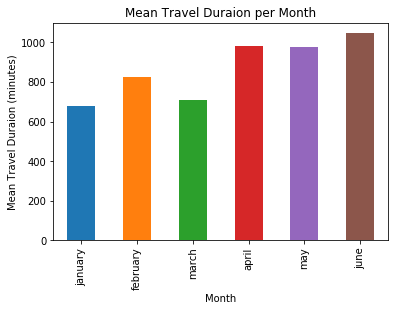

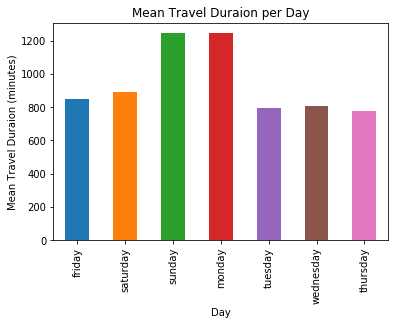

In [3]:
import time
import pandas as pd
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
% matplotlib inline

CITY_DATA = { 'chicago': 'chicago.csv',
              'new york city': 'new_york_city.csv',
              'washington': 'washington.csv' }

cities = ['new york city','chicago','washington']
months = ['january', 'february', 'march', 'april', 'may', 'june','all']
days = ['friday','saturday','sunday','monday','tuesday','wednesday','thursday','all']


def get_filters():
    """
    Asks user to specify a city, month, and day to analyze.

    Returns:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    """
    print('Hello! Let\'s explore some US bikeshare data!')
    # get user input for city (chicago, new york city, washington). HINT: Use a while loop to handle invalid inputs
    city = input("What city you would like to analyze? (Choose between: chicago, new york city and washington)")

    while city not in cities:
        print('Please enter one of the following cities: chicago, new york city and washangton')
        city = input()
    # get user input for month (all, january, february, ... , june)
    month = input("Do you have a month in mind? if not enter 'all. (Choose between: january, february, march april, may june)")
    while month not in months:
        print('Please enter one of the following months: january, february, march april, may and june')
        month = input()

    # get user input for day of week (all, monday, tuesday, ... sunday)
    day = input("Do you have a day in mind? if not enter 'all. (Choose between: friday, saturday, sunday, monday, tuesday, wednesday and thursday)")
    while day not in days:
        print('Please enter one of the following days: friday, saturday, sunday, monday, tuesday, wednesday and thursday')
        day = input()

    print('-'*40)

    return city, month, day

def load_data(city, month, day):
    """
    Loads data for the specified city and filters by month and day if applicable.

    Args:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    Returns:
        df - Pandas DataFrame containing city data filtered by month and day
    """
    filename = CITY_DATA[city]
    df = pd.read_csv(filename)
    # convert the Start Time column to datetime
    df['Start Time'] = pd.to_datetime(df['Start Time'])
    # extract month and day of week from Start Time to create new columns
    df['month'] = df['Start Time'].dt.month
    df['day_of_week'] = df['Start Time'].dt.weekday_name

    if month != 'all':
        month = months.index(month)+1
        df = df[df['month'] == month]

    if day != 'all':
        df = df[df['day_of_week'] == day.title()]
    return df


def time_stats(df,city,month,day):
    """Displays statistics on the most frequent times of travel."""

    print('\nCalculating The Most Frequent Times of Travel...\n')
    start_time = time.time()

    # display the most common month
    common_month = int(df['month'].mode())-1
    print(common_month)
    # display the most common day of week
    common_day = df['day_of_week'].mode()
    # display the most common start hour
    df['hour'] = df['Start Time'].dt.hour
    common_start_hour = df['hour'].mode()

    print('You chose, city ={}, month={}, day={}.'.format(city,month,day))
    print("\nThis took %s seconds." % (time.time() - start_time))
    if month == 'all' and day == 'all':
        print("\nThe most common month and day and hour are {} and {} and {} respectively.".format(months[common_month],common_day[0],common_start_hour[0]))
    elif month != 'all' and day != 'all':
        print("\nThe most common hour of {}'s in {} is {}.".format(common_day[0],months[common_month],common_start_hour[0]))
    elif month != 'all' and day == 'all':
        print("\nThe most common day and hour in {} is {} and {}.".format(months[common_month],common_day[0],common_start_hour[0]))
    elif month == 'all' and day != 'all':
        print("\nThe most common month and hour for {}'s are {} and {}.".format(common_day[0],months[common_month],common_start_hour[0]))
    print('-'*40)


def station_stats(df):
    """Displays statistics on the most popular stations and trip."""

    print('\nCalculating The Most Popular Stations and Trip...\n')
    start_time = time.time()

    # display most commonly used start station
    common_start_station = df['Start Station'].mode()

    # display most commonly used end station
    common_end_station = df['End Station'].mode()

    # display most frequent combination of start station and end station trip
    most_trip = df.groupby(["Start Station", "End Station"]).size().reset_index(name='count').max()


    print("\nThis took %s seconds." % (time.time() - start_time))
    print("\nThe most common start station and end station are {} and {} respectively.".format(common_start_station[0],common_end_station[0]))
    print("\nThe most common trip combination is {}.".format(most_trip))
    print('-'*40)


def trip_duration_stats(df):
    """Displays statistics on the total and average trip duration."""

    print('\nCalculating Trip Duration...\n')
    start_time = time.time()

    # display total travel time
    total_time = df['Trip Duration'].sum()

    # display mean travel time
    mean_time = df['Trip Duration'].mean()


    print("\nThis took %s seconds." % (time.time() - start_time))
    print("\nThe total travel duration is {} minutes.".format(total_time))
    print("\nThe mean travel duration is {} minutes.".format(mean_time))
    print('-'*40)


def user_stats(df):
    """Displays statistics on bikeshare users."""

    print('\nCalculating User Stats...\n')
    start_time = time.time()

    # Display counts of user types
    if 'User Type' in df.columns:
        user_count = df.groupby('User Type')['User Type'].count()
    else:
        user_count = 'This info is not available'
    # Display counts of gender
    if 'Gender' in df.columns:
        gender_count = df.groupby('Gender')['Gender'].count()
    else:
        gender_count = 'This info is not available'
    # Display earliest, most recent, and most common year of birth
    if 'Birth Year' in df.columns:
        common_year = int(df['Birth Year'].mode()[0])
        earliest_year= int(df['Birth Year'].min())
        recent_year= int(df['Birth Year'].max())
    else:
        common_year = 'This info is not available'
        earliest_year= 'This info is not available'
        recent_year= 'This info is not available'


    print("\nThis took %s seconds." % (time.time() - start_time))
    print("\nCounts of user types:")
    print(user_count)
    print("\nCounts of gender:")
    print(gender_count)
    print("\nThe most common birth year is {}:".format(common_year))
    print("\nThe earliest birth year is {}:".format(earliest_year))
    print("\nThe most recent birth year is {}:".format(recent_year))
    print('-'*40)
    

def plot_stat(df,city,month,day):
    
    if month == 'all':
        print("For the city of "+city + ":")
        plt.figure()
        month_usage = df.groupby(['month'])['Trip Duration'].mean()
        month_usage.plot(y='trip duration', kind = 'bar',label = "first plot")
        plt.xticks([0,1, 2, 3,4,5],months)
        plt.title('Mean Travel Duraion per Month')
        plt.xlabel('Month')
        plt.ylabel('Mean Travel Duraion (minutes)');
    
    if day =='all':
        plt.figure()
        day_usage = df.groupby(['day_of_week'])['Trip Duration'].mean()
        day_usage.plot(y='trip duration', kind = 'bar',label="second plot")
        plt.xticks([0,1, 2, 3,4,5,6],days)
        plt.title('Mean Travel Duraion per Day')
        plt.xlabel('Day')
        plt.ylabel('Mean Travel Duraion (minutes)');


        
    
    
    
    
    
def main():
    while True:
        city, month, day = get_filters()
        df = load_data(city, month, day)
        display(df.head())

        time_stats(df,city,month,day)
        station_stats(df)
        trip_duration_stats(df)
        user_stats(df)
        plot_stat(df,city,month,day)

        restart = input('\nWould you like to restart? Enter yes or no. (Enter no to see some plot statistics)\n')
        if restart.lower() != 'yes':
            break


if __name__ == "__main__":
	main()
